In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
random_state = 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Import the telem excel files into colab

In [ ]:
#Telem2014_2015 = pd.read_excel('/content/drive/MyDrive/ECE477/ECE477 Final Project/ECE477 Final Project Data/Telem2014-2015.xlsx')
Telem2017_2018 = pd.ExcelFile('/content/drive/MyDrive/ECE477/ECE477 Final Project/ECE477 Final Project Data/Telem2017-2018.xlsx')

varsityNames2017_2018= ['Jonas','Slear','Teece','Cabanas','Sincavage','Hogan','Kwitchoff']
varsityNames2018_2019= ['Jonas','Dickinson','Slear','Teece','Cabanas','Hogan','Kwitchoff','Pompili']
varsityNames2019_2020= ['Jonas','Kwitchoff','Teece','Long','Eilers','Dickinson','Berg','Pompili']
###Fix naming varsity, rn LONG is in varsity for all 3 years, where he was only in it for the last year!!!!!!



Telem2017_2018list = list()

for sheet in Telem2017_2018.sheet_names:
  Telem2017_2018list.append(pd.read_excel(Telem2017_2018, sheet))



Telem2018_2019 = pd.ExcelFile('/content/drive/MyDrive/ECE477/ECE477 Final Project/ECE477 Final Project Data/Telem2018-2019.xlsx')
Telem2018_2019list = list()

for sheet in Telem2018_2019.sheet_names:
  Telem2018_2019list.append(pd.read_excel(Telem2018_2019, sheet))



Telem2019_2020 = pd.ExcelFile('/content/drive/MyDrive/ECE477/ECE477 Final Project/ECE477 Final Project Data/Telem2019-2020.xlsx')
Telem2019_2020list = list()


for sheet in Telem2019_2020.sheet_names:
  Telem2019_2020list.append(pd.read_excel(Telem2019_2020, sheet))


Create the final combined table and parsed dataset With columns = Name,Catch_angle,Finish_angle,Length,Catch_slip,Finish_slip,Watts,Rating,Piece_length,Piece_duration

In [ ]:
table = pd.DataFrame(columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])

Add data from 2017-2018

In [ ]:
#for 2017-2018 session 1
data = Telem2017_2018list[0]
name_col = data.iloc[2:10,0]
catch_col1 = data.iloc[2:10,1:6]
finish_col1 = data.iloc[2:10,7:12]
length_col1 = data.iloc[2:10,13:18]
CatchS_col1 = data.iloc[2:10,19:24]
FinishS_col1 = data.iloc[2:10,25:30]
Watts_col1 = data.iloc[2:10,31:36]

name_col2 = data.iloc[12:20,0]
catch_col2 = data.iloc[12:20,1:6]
finish_col2 = data.iloc[12:20,7:12]
length_col2 = data.iloc[12:20,13:18]
CatchS_col2 = data.iloc[12:20,19:24]
FinishS_col2 = data.iloc[12:20,25:30]
Watts_col2 = data.iloc[12:20,31:36]
reshaped_data = []
distances = [2000,1000,1000,1000,1000]
rates= [28,30,30,30,30]
for i,name in enumerate(name_col):
  for j in range(4):
    reshaped_data.append([name,catch_col1.iloc[i,j],finish_col1.iloc[i,j],length_col1.iloc[i,j],CatchS_col1.iloc[i,j],FinishS_col1.iloc[i,j],Watts_col1.iloc[i,j],rates[j],distances[j],0])
for i,name in enumerate(name_col2):
  for j in range(4):
    reshaped_data.append([name,catch_col2.iloc[i,j],finish_col2.iloc[i,j],length_col2.iloc[i,j],CatchS_col2.iloc[i,j],FinishS_col2.iloc[i,j],Watts_col2.iloc[i,j],rates[j],distances[j],0])
new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2017_2018:
    new.loc[new['Name'] == name, 'Varsity?'] = 1


table = pd.concat([table,new])
print(table.shape)

(64, 10)


<ipython-input-5-54827b21fd54>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  table = pd.concat([table,new])


In [ ]:
# 2017-2018 session 2
data = Telem2017_2018list[2]
name_col = data.iloc[2:13,0]
catch_col = data.iloc[2:13,1:4]
finish_col = data.iloc[2:13,5:8]
length_col = data.iloc[2:13,9:12]
CatchS_col = data.iloc[2:13,13:16]
FinishS_col = data.iloc[2:13,17:20]
Watts_col = data.iloc[2:13,25:28]
reshaped_data = []
distances=[3000,1250,1300]
rates=[19,29,28]
for i,name in enumerate(name_col):
  for j in range(3):
    reshaped_data.append([name,catch_col.iloc[i,j],finish_col.iloc[i,j],length_col.iloc[i,j],CatchS_col.iloc[i,j],FinishS_col.iloc[i,j],Watts_col.iloc[i,j],rates[j],distances[j],0])


new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2017_2018:
    new.loc[new['Name'] == name, 'Varsity?'] = 1


table = pd.concat([table,new])
print(table.shape)

(97, 10)


In [ ]:
# 2017-2018 session 3
data = Telem2017_2018list[3]



name_col = data.iloc[3:11,0]

catch_col = data.iloc[3:11,1:5]
finish_col = data.iloc[3:11,6:10]
length_col = data.iloc[3:11,11:15]
CatchS_col = data.iloc[3:11,16:20]
FinishS_col = data.iloc[3:11,21:25]
Watts_col = data.iloc[3:11,31:36]
for i,name in enumerate(name_col):
  reshaped_data.append([name,catch_col.iloc[i],finish_col.iloc[i],length_col.iloc[i],CatchS_col.iloc[i],FinishS_col.iloc[i],Watts_col.iloc[i],30,2500,0])
new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])


for name in new['Name']:
  if name in varsityNames2017_2018:
    new.loc[new['Name'] == name, 'Varsity?'] = 1


table = pd.concat([table,new])
print(table.shape)

(138, 10)


Add data from 2018-2019

In [ ]:
# for 2018-2019 session 1
data = Telem2018_2019list[1]
slice1 = slice(4,8)
name_col = data.iloc[slice1,0]
catch_col1 = data.iloc[slice1,2]
finish_col1 = data.iloc[slice1,3]
length_col1 = data.iloc[slice1,4]
CatchS_cols1 = data.iloc[slice1,5]
FinishS_cols1 = data.iloc[slice1,6]
Watts_cols1 = data.iloc[slice1,8]
print(name_col)
slice2 = slice(11,15)
name_col2 = data.iloc[slice2,0]
catch_col2 = data.iloc[slice2,2]
finish_col2 = data.iloc[slice2,3]
length_col2 = data.iloc[slice2,4]
CatchS_cols2 = data.iloc[slice2,5]
FinishS_cols2 = data.iloc[slice2,6]
Watts_cols2 = data.iloc[slice2,8]
print(name_col2)
reshaped_data = []
for i,name in enumerate(name_col):
  reshaped_data.append([name,catch_col1.iloc[i],finish_col1.iloc[i],length_col1.iloc[i],CatchS_cols1.iloc[i],FinishS_cols1.iloc[i],Watts_cols1.iloc[i],29,2000,0])
for i,name in enumerate(name_col2):
  reshaped_data.append([name,catch_col2.iloc[i],finish_col2.iloc[i],length_col2.iloc[i],CatchS_cols2.iloc[i],FinishS_cols2.iloc[i],Watts_cols2.iloc[i],29,2000,0])
print(reshaped_data)
new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2018_2019:
    new.loc[new['Name'] == name, 'Varsity?'] = 1

table = pd.concat([table,new])
print(table.shape)

4    Dickinson
5        Teece
6        Breck
7    Williams?
Name: 2018-11-10 00:00:00, dtype: object
11        Slear
12        Hogan
13    Kwitchoff
14      Cabanas
Name: 2018-11-10 00:00:00, dtype: object
[['Dickinson', 64, 31, 94.4, 13, 9, 276, 29, 2000, 0], ['Teece', 59, 33, 91.9, 10, 15, 265, 29, 2000, 0], ['Breck', 59, 31, 89.9, 9, 14, 238, 29, 2000, 0], ['Williams?', 59, 30, 88.7, 11, 17, 244, 29, 2000, 0], ['Slear', 66, 32, 98, 18, 10, 252, 29, 2000, 0], ['Hogan', 63, 31, 93.5, 12, 15, 262, 29, 2000, 0], ['Kwitchoff', 61, 30, 90.1, 7, 12, 243, 29, 2000, 0], ['Cabanas', 63, 31, 94.4, 11, 13, 291, 29, 2000, 0]]
(146, 10)


In [ ]:
# for 2018-2019 session 2


sessionNumber = 2

data = Telem2018_2019list[sessionNumber]
reshaped_data =[]

name_col = data.iloc[4:12,0]
#print(name_col)
catch_col = data.iloc[4:12,1:6]
finish_col = data.iloc[4:12,7:12]
length_col = data.iloc[4:12,13:18]
CatchS_col = data.iloc[4:12,19:24]
FinishS_col = data.iloc[4:12,25:30]
Watts_col = data.iloc[4:12,37:42]

name_col2 = data.iloc[15:23,0]
catch_col2 = data.iloc[15:23,1:6]
finish_col2 = data.iloc[15:23,7:12]
length_col2 = data.iloc[15:23,13:18]
CatchS_col2 = data.iloc[15:23,19:24]
FinishS_col2 = data.iloc[15:23,25:30]
Watts_col2 = data.iloc[15:23,37:42]

distances = [1000,500,1000,500,1000]
ratings = [30,34,32,36,32]

for i,name in enumerate(name_col):
  for j in range(5):
    reshaped_data.append([name,catch_col.iloc[i,j],finish_col.iloc[i,j],length_col.iloc[i,j],CatchS_col.iloc[i,j],FinishS_col.iloc[i,j],Watts_col.iloc[i,j],ratings[j],distances[j],0])
print(reshaped_data)
new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2018_2019:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new])
print(table.shape)


[['Dickinson', 61, 31, 92, 11, 10, 279, 30, 1000, 0], ['Dickinson', 60, 32, 92, 10, 9, 335, 34, 500, 0], ['Dickinson', 60, 31, 91, 12, 10, 289, 32, 1000, 0], ['Dickinson', 59, 31, 90, 11, 10, 312, 36, 500, 0], ['Dickinson', 59, 32, 91, 12, 11, 272, 32, 1000, 0], ['Teece', 59, 35, 94, 10, 15, 287, 30, 1000, 0], ['Teece', 56, 35, 91, 11, 15, 311, 34, 500, 0], ['Teece', 58, 35, 93, 11, 16, 289, 32, 1000, 0], ['Teece', 57, 34, 91, 10, 15, 324, 36, 500, 0], ['Teece', 58, 35, 93, 10, 16, 310, 32, 1000, 0], ['Breck', 59, 31, 90, 11, 11, 275, 30, 1000, 0], ['Breck', 57, 30, 87, 10, 11, 285, 34, 500, 0], ['Breck', 59, 31, 90, 11, 12, 267, 32, 1000, 0], ['Breck', 57, 30, 87, 10, 12, 284, 36, 500, 0], ['Breck', 58, 30, 88, 12, 13, 247, 32, 1000, 0], ['Thomas', 60, 33, 93, 8, 10, 332, 30, 1000, 0], ['Thomas', 58, 33, 91, 8, 10, 356, 34, 500, 0], ['Thomas', 58, 33, 91, 9, 11, 315, 32, 1000, 0], ['Thomas', 57, 32, 89, 8, 10, 352, 36, 500, 0], ['Thomas', 58, 33, 91, 10, 11, 311, 32, 1000, 0], ['Willi

In [ ]:
# for 2018-2019 session 3

sessionNumber = 3

data = Telem2018_2019list[sessionNumber]
reshaped_data =[]
name_col = data.iloc[1:9,0]
catch_col = data.iloc[1:9,1:3]
finish_col = data.iloc[1:9,4:6]
length_col = data.iloc[1:9,7:9]
CatchS_col = data.iloc[1:9,10:12]
FinishS_col = data.iloc[1:9,13:15]
Watts_col = data.iloc[1:9,19:21]

name_col2 = data.iloc[12:20,0]
catch_col2 = data.iloc[12:20,1:3]
finish_col2 = data.iloc[12:20,4:6]
length_col2 = data.iloc[12:20,7:9]
CatchS_col2 = data.iloc[12:20,10:12]
FinishS_col2 = data.iloc[12:20,13:15]
Watts_col2 = data.iloc[12:20,19:21]
distance =[300,500]
for i,name in enumerate(name_col):
  for j in range(2):
    reshaped_data.append([name,catch_col.iloc[i,j],finish_col.iloc[i,j],length_col.iloc[i,j],CatchS_col.iloc[i,j],FinishS_col.iloc[i,j],Watts_col.iloc[i,j],32,distance[j],0])

print(reshaped_data)
new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2018_2019:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new])
print(table.shape)

[['Jonas', 64, 29, 93, 12, 8, 359, 32, 300, 0], ['Jonas', 63, 30, 93, 10, 10, 340, 32, 500, 0], ['Cabanas', 64, 34, 98, 14, 13, 379, 32, 300, 0], ['Cabanas', 63, 34, 97, 15, 15, 329, 32, 500, 0], ['Hogan', 64, 31, 95, 13, 14, 361, 32, 300, 0], ['Hogan', 62, 30, 93, 12, 15, 339, 32, 500, 0], ['Kwitchoff', 64, 30, 95, 12, 8, 348, 32, 300, 0], ['Kwitchoff', 63, 30, 94, 12, 9, 325, 32, 500, 0], ['Breck', 61, 28, 89, 4, 12, 323, 32, 300, 0], ['Breck', 61, 27, 88, 5, 13, 305, 32, 500, 0], ['Berg', 63, 31, 95, 11, 11, 387, 32, 300, 0], ['Berg', 62, 30, 93, 12, 12, 339, 32, 500, 0], ['Vecchione', 61, 32, 93, 11, 14, 307, 32, 300, 0], ['Vecchione', 61, 32, 93, 10, 13, 306, 32, 500, 0], ['Long', 61, 33, 94, 9, 10, 355, 32, 300, 0], ['Long', 61, 33, 94, 11, 11, 326, 32, 500, 0]]
(202, 10)


In [ ]:
# for 2018-2019 session 4

sessionNumber = 4

data = Telem2018_2019list[sessionNumber]
reshaped_data =[]
name_col = data.iloc[1:9,0]
catch_col = data.iloc[1:9,1:3]
finish_col = data.iloc[1:9,4:6]
length_col = data.iloc[1:9,7:9]
CatchS_col = data.iloc[1:9,10:12]
FinishS_col = data.iloc[1:9,13:15]
Watts_col = data.iloc[1:9,19:21]

name_col2 = data.iloc[13:21,0]
catch_col2 = data.iloc[13:21,1:3]
finish_col2 = data.iloc[13:21,4:6]
length_col2 = data.iloc[13:21,7:9]
CatchS_col2 = data.iloc[13:21,10:12]
FinishS_col2 = data.iloc[13:21,13:15]
Watts_col2 = data.iloc[13:21,19:21]
distance =[1500,1000]

for i,name in enumerate(name_col):
  for j in range(2):
    reshaped_data.append([name,catch_col.iloc[i,j],finish_col.iloc[i,j],length_col.iloc[i,j],CatchS_col.iloc[i,j],FinishS_col.iloc[i,j],Watts_col.iloc[i,j],32,distance[j],0])
for i,name in enumerate(name_col2):
  for j in range(2):
    reshaped_data.append([name,catch_col2.iloc[i,j],finish_col2.iloc[i,j],length_col2.iloc[i,j],CatchS_col2.iloc[i,j],FinishS_col2.iloc[i,j],Watts_col2.iloc[i,j],32,distance[j],0])
print(reshaped_data)
new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2018_2019:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new])
print(table.shape)

[['Jonas', 59, 31, 90, 11, 10, 303, 32, 1500, 0], ['Jonas', 59, 31, 90, 10, 10, 311, 32, 1000, 0], ['Cabanas', 61, 36, 97, 16, 16, 292, 32, 1500, 0], ['Cabanas', 60, 36, 96, 15, 16, 303, 32, 1000, 0], ['Hogan', 57, 35, 92, 11, 16, 308, 32, 1500, 0], ['Hogan', 57, 34, 91, 11, 15, 343, 32, 1000, 0], ['Kwitchoff', 60, 32, 92, 12, 10, 283, 32, 1500, 0], ['Kwitchoff', 59, 31, 90, 12, 10, 286, 32, 1000, 0], ['Breck', 58, 30, 88, 7, 14, 270, 32, 1500, 0], ['Breck', 56, 29, 85, 7, 14, 269, 32, 1000, 0], ['Berg', 60, 31, 91, 14, 13, 270, 32, 1500, 0], ['Berg', nan, nan, nan, nan, nan, nan, 32, 1000, 0], ['Kernisan', nan, nan, nan, nan, nan, nan, 32, 1500, 0], ['Kernisan', 55, 29, 84, 5, 11, 311, 32, 1000, 0], ['Vecchione', 61, 30, 91, 10, 13, 278, 32, 1500, 0], ['Vecchione', 61, 29, 90, 9, 14, 266, 32, 1000, 0], ['Dickinson', 62, 29, 90, 13, 8, 286, 32, 1500, 0], ['Dickinson', 59, 29, 87, 11, 7, 325, 32, 1000, 0], ['Teece', 62, 35, 97, 11, 17, 297, 32, 1500, 0], ['Teece', 60, 34, 94, 11, 17, 30

In [ ]:
# for 2018-2019 session 5

sessionNumber = 5

data = Telem2018_2019list[sessionNumber]
reshaped_data =[]



name_col = data.iloc[1:9,0]
catch_col = data.iloc[1:9,1:4]
finish_col = data.iloc[1:9,5:8]
length_col = data.iloc[1:9,9:12]
CatchS_col = data.iloc[1:9,13:16]
FinishS_col = data.iloc[1:9,17:20]
Watts_col = data.iloc[1:9,25:28]


name_col2 = data.iloc[13:21,0]
catch_col2 = data.iloc[13:21,1:4]
finish_col2 = data.iloc[13:21,5:8]
length_col2 = data.iloc[13:21,9:12]
CatchS_col2 = data.iloc[13:21,13:16]
FinishS_col2 = data.iloc[13:21,17:20]
Watts_col2 = data.iloc[13:21,25:28]
distance =[2000,1500,2000]
rates =[27,27,30]
for i,name in enumerate(name_col):
  for j in range(3):
    reshaped_data.append([name,catch_col.iloc[i,j],finish_col.iloc[i,j],length_col.iloc[i,j],CatchS_col.iloc[i,j],FinishS_col.iloc[i,j],Watts_col.iloc[i,j],rates[j],distance[j],0])

for i,name in enumerate(name_col2):
  for j in range(3):
    reshaped_data.append([name,catch_col2.iloc[i,j],finish_col2.iloc[i,j],length_col2.iloc[i,j],CatchS_col2.iloc[i,j],FinishS_col2.iloc[i,j],Watts_col2.iloc[i,j],rates[j],distance[j],0])
print(reshaped_data)
new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2018_2019:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new])
print(table.shape)


[['Vecchione', 58, 36, 94, 12, 14, 243, 27, 2000, 0], ['Vecchione', 57, 35, 93, 11, 12, 259, 27, 1500, 0], ['Vecchione', 57, 35, 92, 10, 12, 285, 30, 2000, 0], ['Long', 62, 34, 95, 13, 14, 269, 27, 2000, 0], ['Long', 61, 34, 94, 12, 13, 266, 27, 1500, 0], ['Long', 59, 33, 93, 12, 13, 286, 30, 2000, 0], ['Middleton', 61, 30, 91, 14, 12, 219, 27, 2000, 0], ['Middleton', 61, 31, 92, 14, 10, 254, 27, 1500, 0], ['Middleton', 60, 31, 91, 13, 9, 289, 30, 2000, 0], ['Woll', 63, 31, 94, 15, 16, 243, 27, 2000, 0], ['Woll', 63, 31, 94, 15, 15, 249, 27, 1500, 0], ['Woll', 63, 31, 94, 15, 16, 267, 30, 2000, 0], ['Moshirfar', 63, 32, 94, 13, 15, 265, 27, 2000, 0], ['Moshirfar', 63, 32, 95, 14, 16, 246, 27, 1500, 0], ['Moshirfar', 63, 31, 94, 12, 15, 272, 30, 2000, 0], ['Manning', 54, 36, 90, 12, 19, 249, 27, 2000, 0], ['Manning', 52, 36, 88, 12, 18, 254, 27, 1500, 0], ['Manning', 51, 36, 87, 12, 18, 272, 30, 2000, 0], ['DiMarino', 55, 34, 89, 13, 11, 239, 27, 2000, 0], ['DiMarino', 55, 33, 88, 14, 1

In [ ]:
# for 2018-2019 session 6

sessionNumber = 6

data = Telem2018_2019list[sessionNumber]
reshaped_data =[]

name_col = data.iloc[1:9,0]
catch_col = data.iloc[1:9,1:6]
finish_col = data.iloc[1:9,7:12]
length_col = data.iloc[1:9,13:18]
CatchS_col = data.iloc[1:9,19:24]
FinishS_col = data.iloc[1:9,25:30]
Watts_col = data.iloc[1:9,37:42]

name_col2 = data.iloc[13:21,0]
catch_col2 = data.iloc[13:21,1:6]
finish_col2 = data.iloc[13:21,7:12]
length_col2 = data.iloc[13:21,13:18]
CatchS_col2 = data.iloc[13:21,19:24]
FinishS_col2 = data.iloc[13:21,25:30]
Watts_col2 = data.iloc[13:21,37:42]
distance =[1500,1500,1500,1000,1000]
rates = [30,30,30,32,33]

for i,name in enumerate(name_col):
  for j in range(5):
    reshaped_data.append([name,catch_col.iloc[i,j],finish_col.iloc[i,j],length_col.iloc[i,j],CatchS_col.iloc[i,j],FinishS_col.iloc[i,j],Watts_col.iloc[i,j],rates[j],distance[j],0])
z = 0
for i,name in enumerate(name_col2):
  for j in range(5):
    reshaped_data.append([name,catch_col2.iloc[i,j],finish_col2.iloc[i,j],length_col2.iloc[i,j],CatchS_col2.iloc[i,j],FinishS_col2.iloc[i,j],Watts_col2.iloc[i,j],rates[j],distance[j],0])

new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2018_2019:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new])
print(table.shape)

(362, 10)


Add the data from 2019-2020

Read out the data of 1 rower over 1 piece

In [ ]:
# for 2019-2020 session 1
data = Telem2019_2020list[1]
slice1 = slice(4,12)
name_col = data.iloc[slice1,0]
catch_col1 = data.iloc[slice1,2]
finish_col1 = data.iloc[slice1,3]
length_col1 = data.iloc[slice1,4]
CatchS_cols1 = data.iloc[slice1,5]
FinishS_cols1 = data.iloc[slice1,6]
Watts_cols1 = data.iloc[slice1,8]

slice2 = slice(14,22)
name_col2 = data.iloc[slice2,0]
catch_col2 = data.iloc[slice2,2]
finish_col2 = data.iloc[slice2,3]
length_col2 = data.iloc[slice2,4]
CatchS_cols2 = data.iloc[slice2,5]
FinishS_cols2 = data.iloc[slice2,6]
Watts_cols2 = data.iloc[slice2,8]

reshaped_data = []
for i,name in enumerate(name_col):
  reshaped_data.append([name,catch_col1.iloc[i],finish_col1.iloc[i],length_col1.iloc[i],CatchS_cols1.iloc[i],FinishS_cols1.iloc[i],Watts_cols1.iloc[i],22,2000,0])
for i,name in enumerate(name_col2):
  reshaped_data.append([name,catch_col2.iloc[i],finish_col2.iloc[i],length_col2.iloc[i],CatchS_cols2.iloc[i],FinishS_cols2.iloc[i],Watts_cols2.iloc[i],22,3500,0])
print(reshaped_data)
new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2019_2020:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new])
print(table.shape)

[['Kwitchoff', 60, 30, 90, 9, 8, 232, 22, 2000, 0], ['Abraham', 59, 31, 90, 7, 7, 262, 22, 2000, 0], ['Collins', 57.5, 35.5, 93, 11, 16.5, 205, 22, 2000, 0], ['Frascella', 65, 29, 94, 9, 14, 212, 22, 2000, 0], ['Sun', 57, 32, 89, 10, 8, 231, 22, 2000, 0], ['Eilers', 57, 30, 87, 8, 6, 269, 22, 2000, 0], ['Wooldridge', 59, 32, 91, 9, 14, 208, 22, 2000, 0], ['Pompili', 60, 30, 90, 8, 10, 219, 22, 2000, 0], ['Kwitchoff', 58, 31, 89, 9, 7, 243, 22, 3500, 0], ['Abraham', 58, 31, 89, 7, 7, 254, 22, 3500, 0], ['Collins', 55, 33, 88, 10, 16, 197, 22, 3500, 0], ['Frascella', 63, 30, 93, 9, 13, 216, 22, 3500, 0], ['Sun', 57, 31, 88, 9, 6, 247, 22, 3500, 0], ['Eilers', 57, 31, 88, 8, 7, 267, 22, 3500, 0], ['Wooldridge', 59, 32, 91, 9, 14, 207, 22, 3500, 0], ['Pompili', 59, 30, 89, 8, 10, 222, 22, 3500, 0]]
(378, 10)


In [ ]:
# for 2019-2020 session 2
data = Telem2019_2020list[2]
slice1 = slice(4,12)
name_col = data.iloc[slice1,0]
catch_col1 = data.iloc[slice1,2]
finish_col1 = data.iloc[slice1,3]
length_col1 = data.iloc[slice1,4]
CatchS_cols1 = data.iloc[slice1,5]
FinishS_cols1 = data.iloc[slice1,6]
Watts_cols1 = data.iloc[slice1,8]

slice2 = slice(14,22)
name_col2 = data.iloc[slice2,0]
catch_col2 = data.iloc[slice2,2]
finish_col2 = data.iloc[slice2,3]
length_col2 = data.iloc[slice2,4]
CatchS_cols2 = data.iloc[slice2,5]
FinishS_cols2 = data.iloc[slice2,6]
Watts_cols2 = data.iloc[slice2,8]

reshaped_data = []
for i,name in enumerate(name_col):
  reshaped_data.append([name,catch_col1.iloc[i],finish_col1.iloc[i],length_col1.iloc[i],CatchS_cols1.iloc[i],FinishS_cols1.iloc[i],Watts_cols1.iloc[i],22,2000,0])
for i,name in enumerate(name_col2):
  reshaped_data.append([name,catch_col2.iloc[i],finish_col2.iloc[i],length_col2.iloc[i],CatchS_cols2.iloc[i],FinishS_cols2.iloc[i],Watts_cols2.iloc[i],22,3500,0])

new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])
for name in new['Name']:
  if name in varsityNames2019_2020:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new])
print(table.shape)

(394, 10)


In [ ]:


#for2019-2020 session 3
mapping1 = slice(4,12)
data = Telem2019_2020list[3]
name_col = data.iloc[mapping1,0]
catch_cols = data.iloc[mapping1,3:5]
finish_cols = data.iloc[mapping1,7:9]
length_cols = data.iloc[mapping1,11:13]
CatchS_cols = data.iloc[mapping1,15:17]
FinishS_cols = data.iloc[mapping1,19:21]
Watts_cols = data.iloc[mapping1,27:29]
mapping2 = slice(17,26)
name_col2 =(data.iloc[mapping2,0])
catch_cols2 = data.iloc[mapping2,3:5]
finish_cols2 = data.iloc[mapping2,7:9]
length_cols2 = data.iloc[mapping2,11:13]
CatchS_cols2 = data.iloc[mapping2,15:17]
FinishS_cols2 = data.iloc[mapping2,19:21]
Watts_cols2 = data.iloc[mapping2,27:29]
mapping3 = slice(30,36)
name_col3 =(data.iloc[mapping3,0])
catch_cols3 = data.iloc[mapping3,3:5]
finish_cols3 = data.iloc[mapping3,7:9]
length_cols3 = data.iloc[mapping3,11:13]
CatchS_cols3 = data.iloc[mapping3,15:17]
FinishS_cols3 = data.iloc[mapping3,19:21]
Watts_cols3 = data.iloc[mapping3,27:29]
reshaped_data = []
for i, name in enumerate(name_col):
  for j in range(2):
    reshaped_data.append([name,catch_cols.iloc[i,j],finish_cols.iloc[i,j],length_cols.iloc[i,j],CatchS_cols.iloc[i,j],FinishS_cols.iloc[i,j],Watts_cols.iloc[i,j],21,3500,0])



for i, name in enumerate(name_col2):
  for j in range(2):
    reshaped_data.append([name,catch_cols2.iloc[i,j],finish_cols2.iloc[i,j],length_cols2.iloc[i,j],CatchS_cols2.iloc[i,j],FinishS_cols2.iloc[i,j],Watts_cols2.iloc[i,j],21,3500,0])


for i, name in enumerate(name_col3):
  for j in range(2):
    reshaped_data.append([name,catch_cols3.iloc[i,j],finish_cols3.iloc[i,j],length_cols3.iloc[i,j],CatchS_cols3.iloc[i,j],FinishS_cols3.iloc[i,j],Watts_cols3.iloc[i,j],24,3500,0])


new_data = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])




for name in new['Name']:
  if name in varsityNames2019_2020:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new_data])
print(table.shape)

(440, 10)


In [ ]:
#for2019-2020 session 4
sessionNumber = 4

data = Telem2019_2020list[sessionNumber]
reshaped_data =[]

name_col = data.iloc[slice(4,16),0]
#print(name_col)
catch_col = data.iloc[4:16,2:5]
finish_col = data.iloc[4:16,12:15]
length_col = data.iloc[4:16,22:25]
CatchS_col = data.iloc[4:16,32:35]
FinishS_col = data.iloc[4:16,42:45]
Watts_col = data.iloc[4:16,62:65]
for i,name in enumerate(name_col):
  for j in range(3):
    reshaped_data.append([name,catch_col.iloc[i,j],finish_col.iloc[i,j],length_col.iloc[i,j],CatchS_col.iloc[i,j],FinishS_col.iloc[i,j],Watts_col.iloc[i,j],33,300,0])

new = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])

for name in new['Name']:
  if name in varsityNames2019_2020:
    new.loc[new['Name'] == name, 'Varsity?'] = 1

table = pd.concat([table,new])
print(table.shape)


(476, 10)


In [ ]:
#for2019-2020 session 5
sessionNumber = 5


data = Telem2019_2020list[sessionNumber]
reshaped_data =[]

name_col = data.iloc[slice(4,12),0]

catch_col = data.iloc[4:12,2:5]
finish_col = data.iloc[4:12,12:15]
length_col = data.iloc[4:12,22:25]
CatchS_col = data.iloc[4:12,32:35]
FinishS_col = data.iloc[4:12,42:45]
Watts_col = data.iloc[4:12,62:65]
for i,name in enumerate(name_col):
  for j in range(3):
    reshaped_data.append([name,catch_col.iloc[i,j],finish_col.iloc[i,j],length_col.iloc[i,j],CatchS_col.iloc[i,j],FinishS_col.iloc[i,j],Watts_col.iloc[i,j],33,500,0])
new_data = pd.DataFrame(reshaped_data,columns = ['Name','Catch_angle','Finish_angle','Length','Catch_slip','Finish_slip','Watts','Rating','Piece_length','Varsity?'])

for name in new['Name']:
  if name in varsityNames2019_2020:
    new.loc[new['Name'] == name, 'Varsity?'] = 1
table = pd.concat([table,new_data])
print(table.shape)


(500, 10)


In [ ]:
print(pd.unique(table['Name']))



['Long' 'Ogilby' 'Pristo' 'Valicenti' 'Lange' 'OAJ' 'Jonas' 'Watt'
 'Ratliffe' 'Hess' 'Manning' 'Moshirfar' 'Teece' 'Shure' 'Hogan'
 'Sincavage' 'Kwitchoff' 'Slear' 'Swanton' nan 'Carr' 'Cabanas'
 'Arzt-Jones' 'Kernisan' 'Breckenridge' 'McDaniel' 'Holmes' 'Dickinson'
 'Breck' 'Williams?' 'Thomas' 'Williams' 'Woll' 'Middleton' 'Berg'
 'Vecchione' 'DiMarino' 'Scheuritzel' 'Collins' 'Chao' 'Sun' 'Skow' 'Mosh'
 'Butler' 'Abraham' 'Frascella' 'Eilers' 'Wooldridge' 'Pompili' 'Olson'
 'Skinner' 'Borsotti' 'High' 'Gaffney']


In [ ]:
#drop all non numbers and the names column

table_clean = table.drop(columns = ['Name'])
table_clean = table_clean.apply(pd.to_numeric, errors='coerce')
table_clean = table_clean.dropna()
table_clean.to_csv('Final_ECE477_data_table.csv')
print(table_clean.shape)

(445, 9)


Doing the ML part

In [ ]:
#features
X = table_clean.iloc[:,0:-1]
X = np.array(X)
#target
y = table_clean.iloc[:,-1]
y = np.array(y)

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.8, random_state=random_state)



In [ ]:
#MLP try

clf =  MLPClassifier(random_state=random_state, max_iter=400).fit(X_train, y_train)

clf.score(X_val,y_val)

0.7303370786516854

In [ ]:
for i in range(1,15):
  forest_i = RandomForestClassifier(random_state=random_state, criterion='gini',max_depth=i).fit(X_train, y_train)
  print("forest",i,forest_i.score(X_val,y_val))



forest = RandomForestClassifier(random_state=random_state, criterion='gini',max_depth=4).fit(X_train, y_train)
forest.score(X_val,y_val)


forest 1 0.7387640449438202
forest 2 0.7443820224719101
forest 3 0.7808988764044944
forest 4 0.8202247191011236
forest 5 0.7893258426966292
forest 6 0.7837078651685393
forest 7 0.8061797752808989
forest 8 0.7865168539325843
forest 9 0.7837078651685393
forest 10 0.7780898876404494
forest 11 0.7780898876404494
forest 12 0.7780898876404494
forest 13 0.7780898876404494
forest 14 0.7780898876404494


0.8202247191011236

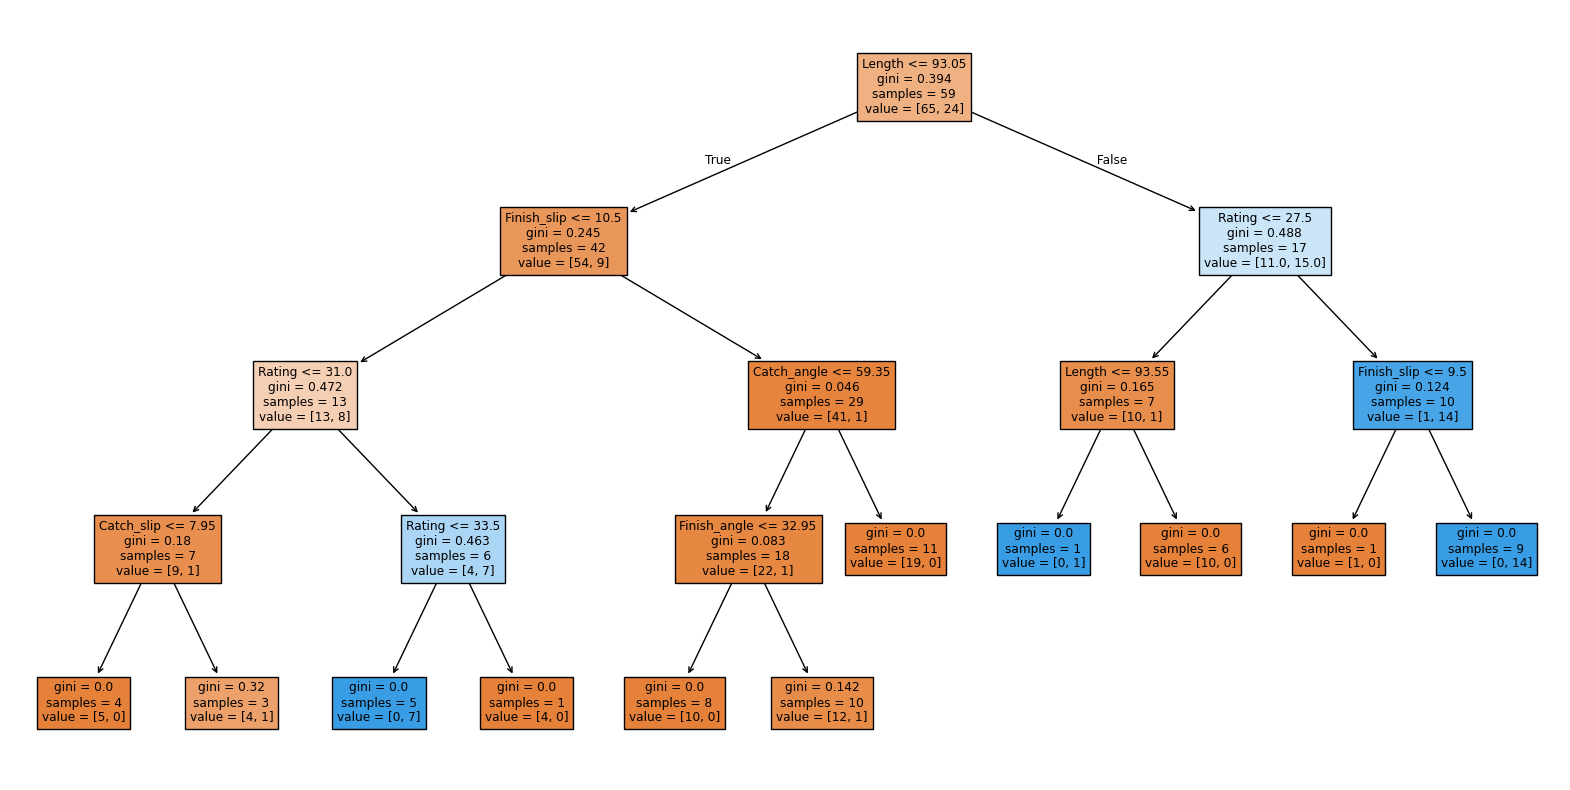

In [ ]:

feature_names = ['Catch_angle', 'Finish_angle', 'Length', 'Catch_slip', 'Finish_slip', 'Watts', 'Rating', 'Piece_length']

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(forest.estimators_[0], feature_names=list(feature_names), filled=True)
plt.show()

MLP gives an accuracy of around 82.0%